In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

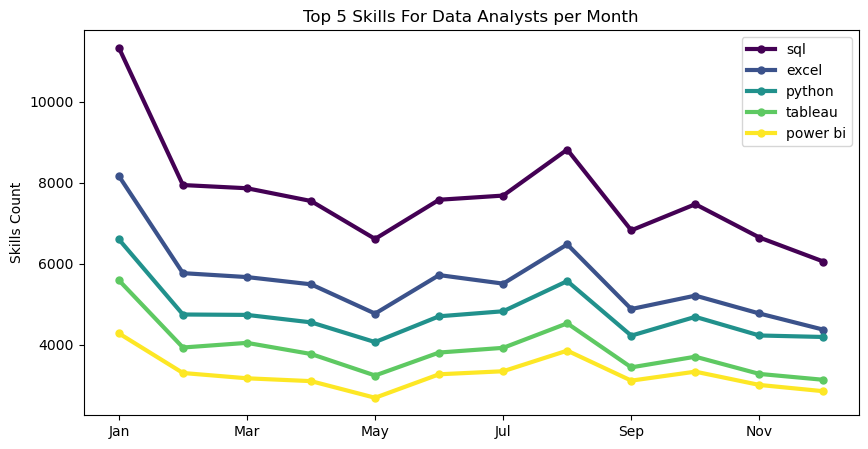

In [54]:
#Create a new column for month numbers
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

#Explode the job_skills and pivot
df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

#Sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.apply(sum)
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

#Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot.set_index('job_posted_month',inplace=True)
df_DA_pivot.drop(columns='job_posted_month_no', inplace=True)

#Get the top 5 skills and plot
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=3,
    linestyle='-', #options: '-', '--', '-.', ':'
    colormap='viridis', #options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    marker='o', #options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', ...
    markersize=5,
    figsize=(10,5)
                             
)
plt.legend()
plt.xlabel('')
plt.ylabel('Skills Count')
plt.title(f'Top 5 Skills For Data Analysts per Month')
plt.show()

In [55]:
df_exploded = df_DA.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


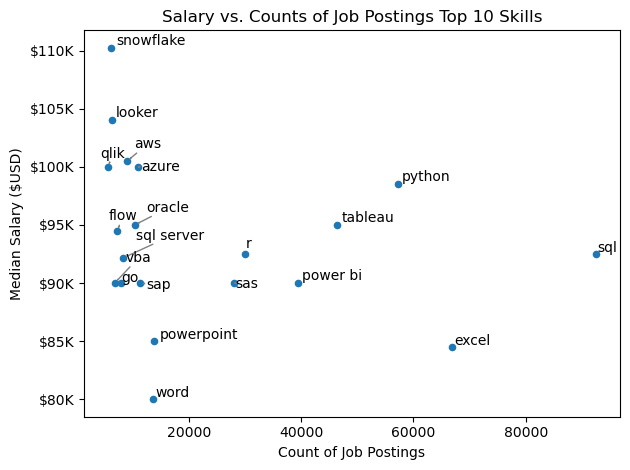

In [74]:
from adjustText import adjust_text
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

plt.title('Salary vs. Counts of Job Postings Top 10 Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary ($USD)')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

plt.tight_layout()
plt.show()